In [2]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the model commands
from sklearn.tree     import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression


# Importing the model evaluation commands
from sklearn.model_selection import(
                                    train_test_split,
                                    cross_val_score,
                                    cross_val_predict,
                                    GridSearchCV,
                                    RandomizedSearchCV
                                    )
from sklearn.metrics import (
                             mean_squared_error,
                             r2_score,
                             explained_variance_score,
                             roc_curve,
                             auc
                              )

The classification task using ensembles uses the majority vote for label class and a weighted average to the class probability. In a regression task, the predicition of a ensemble is done by a simple average of the predictions. We now show this expedient using the AMES House Dataset:

In [7]:
# Define Functions That Evaluate Model Performance
##########################- Root Mean Square -####################################
def rmse(model, x_val, y_val):
    pred = model.predict(x_val)
    return np.sqrt(mean_squared_error(y_val, pred))
##########################- R2 Score -###########################################
def r2(model, x_val, y_val):
    pred = model.predict(x_val)
    return r2_score(y_val, pred)
##########################- Accuracy -###########################################
def accuracy(model, x_val, y_val):
    pred = model.predict(x_val)
    return r2_score(y_val, pred)
##########################- Precision -##########################################
def precision(model, x_val, y_val):
    pred = model.predict(x_val)
    return r2_score(y_val, pred)
##########################- Recall -#############################################
def recall(model, x_val, y_val):
    pred = model.predict(x_val)
    return r2_score(y_val, pred)
##########################- Classification Repor -###############################
def report(model, x_val, y_val):
    pred = model.predict(x_val)
    return r2_score(y_val, pred)
##########################- ROC -################################################
def roc(model, x_val, y_val):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = dt.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    return plt.show()
##########################- Validation Plot -####################################
def valid_reg(model, x_val, y_val):
    # Place an orange "X" on the point with the best Sharpe ratio
    pred = model.predict(x_val)
    fig, ax = plt.subplots()
    plt.scatter(x=y_val, y=pred,alpha=0.5,color='green')
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.grid()
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    return plt.show()

In [26]:
df_ames = pd.read_csv("ames_train.csv")
#df_ames_test = pd.read_csv("ames_test.csv")

In [27]:
df_ames=df_ames.dropna(axis=1)
df_ames.drop('Id',axis=1,inplace=True)
#df_ames_test=df_ames_test.dropna(axis=1)
#df_ames_test.drop('Id',axis=1,inplace=True)

In [28]:
df_ames = pd.get_dummies(df_ames)
#df_ames_test = pd.get_dummies(df_ames_test)

In [29]:
X =df_ames.drop('SalePrice',axis=1)
y = df_ames[['SalePrice']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=84)

In [31]:
regressor_tree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, min_samples_split=5,random_state=42)

In [32]:
regressor_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, min_samples_split=5,
                      random_state=42)

In [33]:
print(f"rmse on training set: {rmse(regressor_tree,X_train,y_train)}")
print(f"R2 on training set: {r2(regressor_tree,X_train,y_train)}")

rmse on training set: 33821.17508999872
R2 on training set: 0.8320074060216258


In [34]:
print(f"rmse on test set: {rmse(regressor_tree,X_test,y_test)}")
print(f"R2 on test set: {r2(regressor_tree,X_test,y_test)}")

rmse on test set: 33501.19161873184
R2 on test set: 0.781359739272957


In [35]:
rf_regressor = RandomForestRegressor(oob_score=True,n_estimators=100, random_state=42)

In [36]:
rf_regressor.fit(X_train,y_train)

C:\Users\Pichau\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(oob_score=True, random_state=42)

In [37]:
print(f"rmse on training set: {rmse(rf_regressor,X_train,y_train)}")
print(f"R2 on training set: {r2(rf_regressor,X_train,y_train)}")

rmse on training set: 11668.818182967234
R2 on training set: 0.9800029240291993


In [38]:
print(f"rmse on test set: {rmse(rf_regressor,X_test,y_test)}")
print(f"R2 on test set: {r2(rf_regressor,X_test,y_test)}")

rmse on test set: 25764.607326608464
R2 on test set: 0.8706826839281995


# Hyper-Parameter Tuning with Cross-Validation

Hyper-parameter tuning is an essential step in building a ML algorithm. This is not only an execution of cross-validation but a direct tuning of model complexity.

## Grid Search Cross-Validation

Grid Search Cross-Validation produces an exhaustive search for the best combination of parameters that maximizes the cross-validated performance with respect to a given performance scoring function. It is in fact a process that has a high computational cost, however if one does not have any clue about underlying structure of data it could be a reasonable first approach. We now implement a high standard GridSearch using Sklearn's implementation.

In [40]:
def clfHyperFit_acc(feat,lbl,times,classifier,param_grid,weights,cv=10,bagging=[0,None,1.],
                rndSearchIter=0,n_jobs=-1,pctEmbargo=0.01):
    if set(lbl.values)=={0,1}:scoring='f1' # f1 for meta-labeling
    else:scoring='accuracy' # symmetric towards all cases
    #1) hyperparameter search, on train data
    inner_cv=PurgedKFold(n_splits=cv,t1=times,pctEmbargo=pctEmbargo) # purged
    if rndSearchIter==0:
        gs=GridSearchCV(estimator=classifier,param_grid=param_grid,
            scoring=scoring,cv=inner_cv,n_jobs=n_jobs,iid=False)
    else:

        gs=RandomizedSearchCV(estimator=classifier,param_distributions= \
            param_grid,scoring=scoring,cv=inner_cv,n_jobs=n_jobs,
            iid=False,n_iter=rndSearchIter)
    gs=gs.fit(feat,lbl,weights)

    return gs

In [41]:
def clfHyperFit_auc(feat,lbl,times,classifier,param_grid,weights,cv=10,bagging=[0,None,1.],
                rndSearchIter=0,n_jobs=-1,pctEmbargo=0.01):
    if set(lbl.values)=={0,1}:scoring='f1' # f1 for meta-labeling
    else:scoring='roc_auc' # symmetric towards all cases
    #1) hyperparameter search, on train data
    inner_cv=PurgedKFold(n_splits=cv,t1=times,pctEmbargo=pctEmbargo) # purged
    if rndSearchIter==0:
        gs=GridSearchCV(estimator=classifier,param_grid=param_grid,
            scoring=scoring,cv=inner_cv,n_jobs=n_jobs,iid=False)
    else:

        gs=RandomizedSearchCV(estimator=classifier,param_distributions= \
            param_grid,scoring=scoring,cv=inner_cv,n_jobs=n_jobs,
            iid=False,n_iter=rndSearchIter)
    gs=gs.fit(feat,lbl,weights)

    return gs

In [42]:
rfc = RandomForestClassifier(oob_score=True, random_state=42)

In [43]:
loan_data_inputs_train = pd.read_csv('credit_train_dataset_final.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('credit_test_dataset_final.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [44]:
n_estimators = [300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 1,
                     n_jobs = -1)
bestF = gridF.fit(loan_data_inputs_train, loan_data_targets_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


KeyboardInterrupt: 

GridSearch is a brute-force approach to model selection using cross-validation. It is a dictionary of user defined parameters, with possible values for the chosen parameters, and then GridSearch trains a model with every single possible combination of the selected parameters. The best model is the one with best performance score under the selected metric.

In [ ]:
forestOpt = RandomForestClassifier(random_state = 42,
                                   oob_score=True,
                                   max_depth = bestF.best_params_['max_depth'],
                                   n_estimators = bestF.best_params_['n_estimators'],
                                   min_samples_split = bestF.best_params_['min_samples_split'],
                                   min_samples_leaf = bestF.best_params_['min_samples_leaf'])

modelOpt = forestOpt.fit(loan_data_inputs_train, loan_data_targets_train)
y_pred = modelOpt.predict(loan_data_inputs_test)

## Randomized Search Cross-Validation

Now, a machine learning with large number of parameters, GridSearch becomes computationaly intractable. In this case, an alternative with good statistical properties is RandomizedSearch. The general idea is that instead of train every single possible combination, one can sample than from a distribution. There are two main advantages. The first one is that we can control the number of combinations we are going to search, regardless the dimensionality of the problem. Second, irrelevant combinations do not increase the computational time.

In [46]:
n_estimators = [300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)

randomF = RandomizedSearchCV(rfc, hyperF, cv = 3, verbose = 1,
                     n_jobs = -1, n_inter=10)
bestF = randomF.fit(loan_data_inputs_train, loan_data_targets_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
def clfHyperFitnn(feat,lbl,t1,clf,param_grid,sample_weights,cv=10,
                rndSearchIter=0,n_jobs=-1,pctEmbargo=0.01):
    if set(lbl.values)=={0,1}:scoring='f1' # f1 for meta-labeling
    else:scoring='accuracy' # symmetric towards all cases
    #1) hyperparameter search, on train data
    inner_cv=PurgedKFold(n_splits=cv,t1=t1,pctEmbargo=pctEmbargo) # purged
    if rndSearchIter==0:
        gs=GridSearchCV(estimator=clf,param_grid=param_grid,
            scoring=scoring,cv=inner_cv,n_jobs=n_jobs,iid=False)
    else:

        gs=RandomizedSearchCV(estimator=clf,param_distributions= \
            param_grid,scoring=scoring,cv=inner_cv,n_jobs=n_jobs,
            iid=False,n_iter=rndSearchIter)
    gs=gs.fit(feat,lbl,sample_weights) 

    return gs

# Feature Importance

One of the most common errors in build a machine learning model is to take data, and run it through a machine learning model and repeat the process until a good looking performance. This is methodological error and some statistical journals considers thius pratice a fraud.

The main reason is, that most of the validation procedures, sometimes called backtest procedures, are at some point prone to overfit. Thus an exhaust search for the best parameters alone, could some how lead us to wrong choices. This is the reason why linear models and trees are so popular until today. They are interpretable, due to visual aspects, or due to the fact that we can perform inference upon the coefficients and determine the statistical significance or the impact of each feature.

Supose that you are given a classification task, and we choose a ensemble method and we are willing to answere the natural question about which features contributes most to the classification problem. Maybe we can include more features, in order to strength the classification power of the model or undertand the effects of substitution of features. A method that peforms such investigation opens the black box of machine learning models.
Once we have found what features are important, we can learn more by concudcting a number of experiments. Are these features important all the time, or only in some specific enviroments? What triggers a change in importance over time? Can those regime swithces be predicted? This turns the construction of machine learning models a research activity.

As in linear models, feature importance could be affected by substitution effects. Thus we need to distinguish between feature importance nmethods bases on whether they are impacted by substitution effects. This effects tak places when the estimated importance of one feature is reduced by the presence of other related features. This is the analogous of multi-colinearity in machine learning. 

## Feature Importance With Substitution Effects

### Mean Decrease Impurity

For tree-based classifier, there is a fast explanatory-importance called Mean decrease impurity. At each node of each decision tree, the selected feature splits the subset it received in such a way that impurity is decreased. Therefore, for each decision tree, one can derive how much of the overall impurity decrease can be assigned to each feature. In a random forest, this decrease in impurity is averaged across all estimators and rank the features accordingly. 
Sklearn's implementation of random forest uses this method as feature importance score. This is because it can be calculated on the fly, with minimum computational cost.

### Mean Decrease Accuracy

Mean decrease accuracy is a slow, predictive-importance (out-of-sample) mthod. First of all, one fits a classifier, than we derive its OOS performance using some performance score. We thus permute each columns of the feature matrix, one at a time, deriving the very same performance at each permutation. The importance of a function is a function of the loss in performance caused by its columns permutation.

## Feature Importance Without Substitution Effects

Substitution effects can lead us to discard important features that happen to be redundant. In prediction, this is not generally a problem, but we could lead us to wrong conclusion when we are trying to undertand, improve, or simplify a model. For this reason, the following single feature importance method can be a good complement to MDI and MDA.

### Single Feature Importance 

Single feature importance is a cross-section predictive-importance (out-of-sample) method. It computes the OOS performance score of each feature in isolation. A few considerations:

1. This method can be applied to any classifier, not only restricted to trees.
2. SFI can be applied to any performance score
3. No substitution effects take place.
4. Can conclude that all features are uniportant.

## Implemenations

In [49]:
# view the feature scores

feature_scores = pd.Series(rf_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

OverallQual            0.575937
GrLivArea              0.088925
2ndFlrSF               0.047628
TotalBsmtSF            0.040447
GarageCars             0.033661
                         ...   
Condition2_PosA        0.000000
RoofMatl_Roll          0.000000
Exterior1st_BrkComm    0.000000
Exterior1st_AsphShn    0.000000
ExterCond_Po           0.000000
Length: 215, dtype: float64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

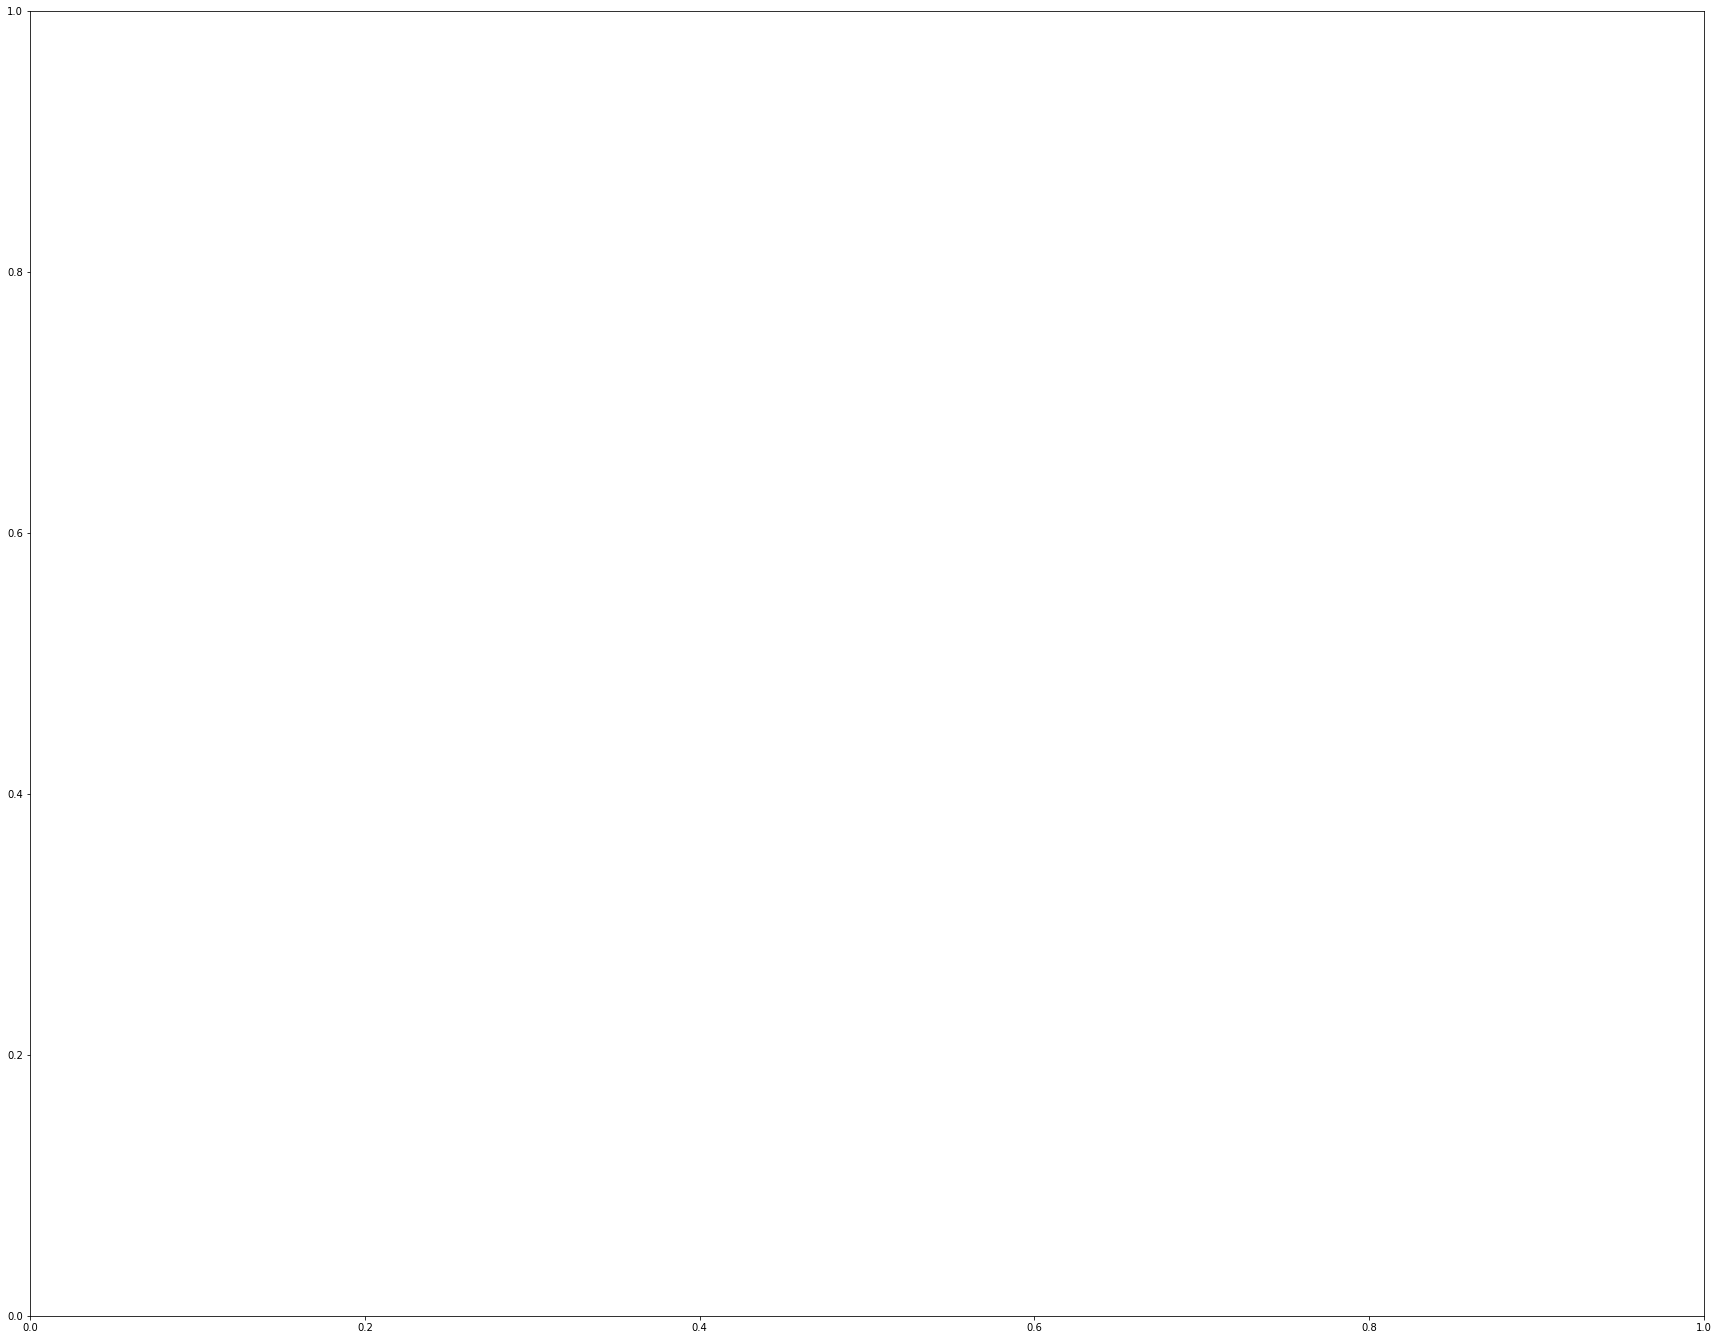

In [51]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=feature_scores)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [48]:
import shap

In [52]:
explainer = shap.Explainer(rf_regressor.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 439it [01:02,  6.99it/s]                                                                        


In [53]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

Permutation explainer: 1461it [12:10,  2.00it/s]                                                                       


AttributeError: 'Explanation' object has no attribute '_old_format'

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.bar(shap_values)